# Supervised Learning Challenge: Model Comparison

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ds_useful as ds
import math
import time

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

## Gather the Data

In [144]:
data = pd.read_csv('datasets/TSLA.csv')

In [145]:
tsla = data.copy()
print(tsla.info())
tsla.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
Date         2416 non-null object
Open         2416 non-null float64
High         2416 non-null float64
Low          2416 non-null float64
Close        2416 non-null float64
Adj Close    2416 non-null float64
Volume       2416 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [146]:
ds.missingness_summary(tsla, print_log=True)
ds.outliers_summary(tsla, print_log=True)
ds.repeats_summary(tsla, print_log=True)
print()

Volume       0.0
Adj Close    0.0
Close        0.0
Low          0.0
High         0.0
Open         0.0
Date         0.0
dtype: float64
Volume       4.552980
Adj Close    0.124172
Close        0.124172
Low          0.124172
High         0.124172
Open         0.124172
dtype: float64
Repeated values: [0]
Volume       0.0
Adj Close    0.0
Close        0.0
Low          0.0
High         0.0
Open         0.0
Date         0.0
dtype: float64



In [147]:
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
2411   2020-01-28
2412   2020-01-29
2413   2020-01-30
2414   2020-01-31
2415   2020-02-03
Name: Date, Length: 2416, dtype: datetime64[ns]

In [148]:
tsla['Range'] = tsla['High'] - tsla['Low']
tsla['Gain'] = tsla['Close'] - tsla['Open']

In [149]:
b4_tsla = tsla.copy()
print(b4_tsla.head())


b4_tsla['Date'] = tsla['Date'] + pd.to_timedelta('1 days')
print(b4_tsla.head())

Date       Open   High        Low      Close  Adj Close    Volume  \
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
3 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
4 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

      Range      Gain  
0  7.459999  4.889999  
1  7.120001 -1.960001  
2  5.650000 -3.040001  
3  4.390001 -3.799999  
4  4.170000 -3.889999  
        Date       Open   High        Low      Close  Adj Close    Volume  \
0 2010-06-30  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
1 2010-07-01  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2 2010-07-02  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
3 2010-07-03  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
4 2010-07-07  20

In [150]:
# rename next_day df, columns

for column in b4_tsla.columns:
    if column == 'Date': continue
    b4_tsla.rename({column: f'b4_{column}'}, axis=1, inplace=True)

b4_tsla

,Date,b4_Open,b4_High,b4_Low,b4_Close,b4_Adj Close,b4_Volume,b4_Range,b4_Gain
0,2010-06-30,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,7.459999,4.889999
1,2010-07-01,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,7.120001,-1.960001
2,2010-07-02,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,5.650000,-3.040001
3,2010-07-03,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,4.390001,-3.799999
4,2010-07-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,4.170000,-3.889999
...,...,...,...,...,...,...,...,...,...
2411,2020-01-29,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,18.729981,-1.589966
2412,2020-01-30,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,22.369995,5.299988
2413,2020-01-31,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,32.880005,8.390015
2414,2020-02-01,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,20.479980,10.570007


In [151]:
# now join the current_day close with the previous day data
print(tsla['Date'].dtype)
print(b4_tsla['Date'].dtype)

tsla_feat = b4_tsla.merge(tsla[['Date', 'Close']], on='Date')
tsla_feat.head()

datetime64[ns]
datetime64[ns]


,Date,b4_Open,b4_High,b4_Low,b4_Close,b4_Adj Close,b4_Volume,b4_Range,b4_Gain,Close
0,2010-06-30,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,7.459999,4.889999,23.830000
1,2010-07-01,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,7.120001,-1.960001,21.959999
2,2010-07-02,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,5.650000,-3.040001,19.200001
3,2010-07-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,4.170000,-3.889999,15.800000
4,2010-07-08,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1.649999,-0.600000,17.459999


In [152]:
tsla_feat.corr()

,b4_Open,b4_High,b4_Low,b4_Close,b4_Adj Close,b4_Volume,b4_Range,b4_Gain,Close
b4_Open,1.000000,0.999539,0.999567,0.999008,0.999008,0.496282,0.719890,0.036453,0.997528
b4_High,0.999539,1.000000,0.999486,0.999643,0.999643,0.505685,0.731745,0.061014,0.998159
b4_Low,0.999567,0.999486,1.000000,0.999544,0.999544,0.487593,0.709518,0.058169,0.998044
b4_Close,0.999008,0.999643,0.999544,1.000000,1.000000,0.498000,0.722662,0.080913,0.998558
b4_Adj Close,0.999008,0.999643,0.999544,1.000000,1.000000,0.498000,0.722662,0.080913,0.998558
b4_Volume,0.496282,0.505685,0.487593,0.498000,0.498000,1.000000,0.749121,0.067706,0.499119
b4_Range,0.719890,0.731745,0.709518,0.722662,0.722662,0.749121,1.000000,0.104475,0.721949
b4_Gain,0.036453,0.061014,0.058169,0.080913,0.080913,0.067706,0.104475,1.000000,0.081704
Close,0.997528,0.998159,0.998044,0.998558,0.998558,0.499119,0.721949,0.081704,1.000000


In [153]:
tsla_feat.drop('b4_Adj Close', axis=1, inplace=True)
tsla_feat.corr()

,b4_Open,b4_High,b4_Low,b4_Close,b4_Volume,b4_Range,b4_Gain,Close
b4_Open,1.000000,0.999539,0.999567,0.999008,0.496282,0.719890,0.036453,0.997528
b4_High,0.999539,1.000000,0.999486,0.999643,0.505685,0.731745,0.061014,0.998159
b4_Low,0.999567,0.999486,1.000000,0.999544,0.487593,0.709518,0.058169,0.998044
b4_Close,0.999008,0.999643,0.999544,1.000000,0.498000,0.722662,0.080913,0.998558
b4_Volume,0.496282,0.505685,0.487593,0.498000,1.000000,0.749121,0.067706,0.499119
b4_Range,0.719890,0.731745,0.709518,0.722662,0.749121,1.000000,0.104475,0.721949
b4_Gain,0.036453,0.061014,0.058169,0.080913,0.067706,0.104475,1.000000,0.081704
Close,0.997528,0.998159,0.998044,0.998558,0.499119,0.721949,0.081704,1.000000


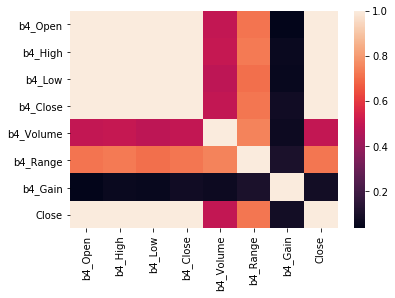

In [154]:
sns.heatmap(tsla_feat.corr())

In [155]:
similar_cols = ds.similar_variables(tsla_feat, 'Close')
similar_cols
#This function needs some work ^^^ for now we'll manually drop the columns that are too correlated

b4_Open    0.998159
b4_Open    0.998044
b4_Open    0.998558
b4_Low     0.998044
b4_High    0.998558
b4_Low     0.998558
dtype: float64

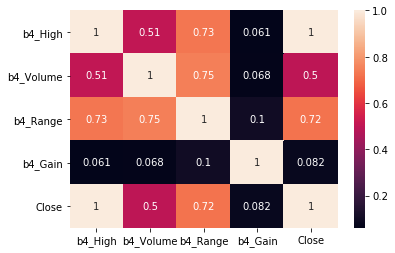

In [156]:
drop_cols = ['Date', 'b4_Open', 'b4_Close', 'b4_Low']
tsla_feat.drop(drop_cols, axis=1, inplace=True)
X = tsla_feat.drop(['Close'], axis=1)
Y = tsla_feat['Close']

sns.heatmap(tsla_feat.corr(), annot=True)

In [157]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state = 537)
print(Y)
X

0        23.830000
1        21.959999
2        19.200001
3        15.800000
4        17.459999
           ...    
1883    564.820007
1884    566.900024
1885    580.989990
1886    640.809998
1887    650.570007
Name: Close, Length: 1888, dtype: float64


,b4_High,b4_Volume,b4_Range,b4_Gain
0,25.000000,18766300,7.459999,4.889999
1,30.420000,17187100,7.120001,-1.960001
2,25.920000,8218800,5.650000,-3.040001
3,20.000000,6866900,4.170000,-3.889999
4,16.629999,6921700,1.649999,-0.600000
...,...,...,...,...
1883,582.000000,19651000,26.400024,7.950012
1884,564.440002,13608100,25.159973,16.030030
1885,576.809998,11788500,18.729981,-1.589966
1886,589.799988,17801500,22.369995,5.299988


In [158]:
import statsmodels.api as sm

lrm_sm = sm.OLS(Y_train, sm.add_constant(X_train))
result = lrm_sm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.139e+05
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:56:02   Log-Likelihood:                -5025.5
No. Observations:                1510   AIC:                         1.006e+04
Df Residuals:                    1505   BIC:                         1.009e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1199      0.337     -0.356      0.722      -0.780       0.540
b4_High        1.0009      0.002    468.382      0.000       0.997       1.005
b4_Volume   1.411e-07   5.55e-08      2.544      0.011    3.23e-08     2.5e-07
b4_Range      -0.5875      0.061     -9.594      0.000      -0.708      -0.467
b4_Gain        0.5225      0.033     15.664      0.000       0.457       0.588
==============================================================================
Omnibus:                      357.171   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10427.809
Skew:                           0.429   Prob(JB):                         0.00
Kurtosis:                      15.845   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error

lrm = LinearRegression()
lrm.fit(X_train, Y_train)

print('Training score', lrm.score(X_train, Y_train))
print('Testing score', lrm.score(X_test, Y_test))
ds.print_evaluation_metrics(Y_test, lrm.predict(X_test))

Training score 0.9967082034626155
Testing score 0.9978924935835526
Mean absolute error of the prediction is: 3.597103516754407
Mean squared error of the prediction is: 31.202969379372643
Root mean squared error of the prediction is: 5.5859618132755475
Mean absolute percentage error of the prediction is: 2.264309467520742


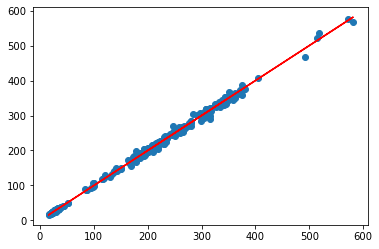

In [160]:
predictions = lrm.predict(X_test)

plt.scatter(Y_test, predictions)
plt.plot(Y_test, Y_test, 'r')

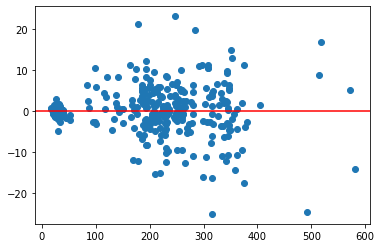

In [161]:
residuals = predictions - Y_test

plt.scatter(Y_test, residuals)
plt.axhline(0, color='r')

In [162]:
sns.lineplot(y=lrm.predict(X), x=tsla_feat['Date'], alpha=.5)
sns.lineplot(y=Y, x=tsla_feat['Date'], alpha=.5)

KeyError: 'Date'

In [ ]:
sns.lineplot(y=lrm.predict(X) - Y, x=tsla_feat['Date'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, Y_train)

print('Training score', knn.score(X_train, Y_train))
print('Testing score', knn.score(X_test, Y_test))
ds.print_evaluation_metrics(Y_test, knn.predict(X_test))

The knn algorithm performed amazingly worse than the linear regression model. This makes sense, since regression defines a function with coefficients assigning each feature's affect on the outcome, then letting each feature have that much say in the outcome by plugging and playing. Knn, however, looks at a bunch of nearby variables and aggregates the prediction across them. This is limited to only being able to aggregate between outcomes that have previously occurred. The knn-model, trying to work properly, ended up overfitting the training data every time. The reason the data is so favorable of the linear regression model is because every variable is continuous, therefore future predictions would be most helpful when based off of a function, rather than an aggregation of past predictions.